Problemy:
- przy dużych danych dostaję błąd znajdowania wartości własnych
- jeśli te same dane podam w batchach do xsfa to model się sensownie uczy

Pytania:
- jak zaimplementowane jest przetwarzanie batchy?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pickle
import mdp

In [21]:
with open("../../../advanced-data-mining/Projekt/Notebooki/Pickle/Ecola-szeregi256-std-bezWygl","rb") as plik:
    szeregi=pickle.load(plik)

szeregi=szeregi[:150,:50].T

In [23]:
szeregi.shape

(50, 150)

In [5]:
X=szeregi

In [97]:
rozwiniecie=mdp.nodes.PolynomialExpansionNode(2)

X=rozwiniecie.execute(szeregi)

In [98]:
X.shape

(500, 33152)

In [99]:
sfa=mdp.nodes.SFANode(rank_deficit_method="svd")

In [ ]:
Y=sfa.execute(X,10)

In [ ]:
Y.shape

In [ ]:
plt.gcf().set_size_inches(14,5)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.plot(Y[:,i])

# XSFA

In [39]:
class gen:
    def __init__(self, szeregi, krok=None):
        self.szeregi=szeregi
        self.krok=krok
        self.licznik=0
    
    def __iter__(self):
        dl=self.szeregi.shape[1]
        tfN=mdp.nodes.TimeFramesNode(5)
        #print(f"Wartość lincznika generatora: {self.licznik}")
        for i in range(0,dl):
            S=self.szeregi[:,i:i+1]
            yield tfN.execute(S)

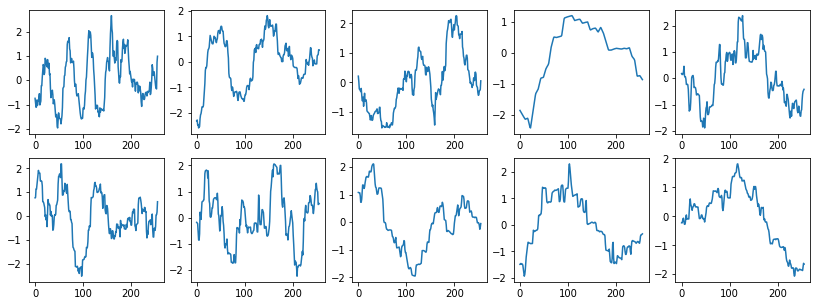

In [22]:
plt.gcf().set_size_inches(14,5)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.plot(szeregi[:,i])

In [40]:
with open("../../../advanced-data-mining/Projekt/Notebooki/Pickle/Ecola-szeregi256-std-bezWygl","rb") as plik:
    szeregi=pickle.load(plik).T

#szeregi=szeregi[:50,:].T

In [41]:
flow=mdp.Flow([mdp.nodes.XSFANode(verbose=True, output_dim=4, 
                                 basic_exp=(mdp.nodes.PolynomialExpansionNode,(6,),{}),
                                 intern_exp=(mdp.nodes.PolynomialExpansionNode,(8,),{}),svd=True)])

In [42]:
szeregi.shape

(256, 4081)

In [43]:
flow.train([gen(szeregi)])

Extracting source 1...
Extracting source 2...
Extracting source 3...
Extracting source 4...


In [44]:
Y=[]
g=gen(szeregi).__iter__()
for i in range(4):
    Y.append(flow.execute(next(g)))

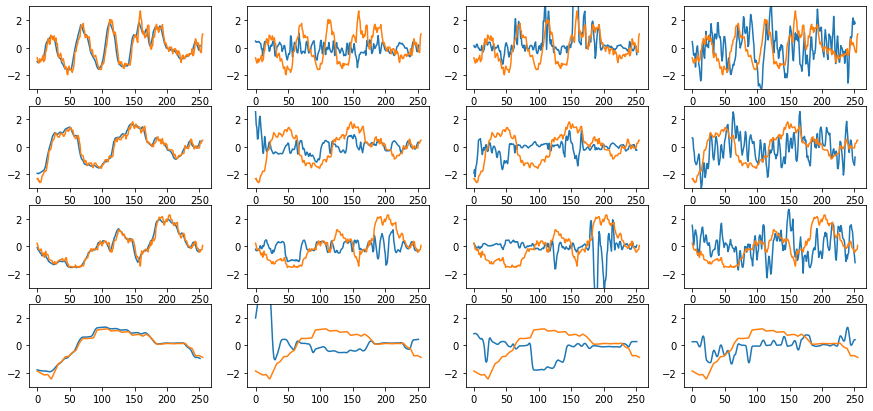

In [46]:
plt.gcf().set_size_inches(15,7)
LIM=3
I=4
J=4
for i in range(I):
    for j in range(J):
        plt.subplot(4,4,i*J+1+j)
        plt.ylim(-LIM,LIM)
        plt.plot(Y[i][:,j])
        plt.plot(szeregi[:,i])